# Example

There are some steps on how to use `energy_manager` in any project:

## 1. Installation

In [1]:
#%pip install energy_manager


## 2. Imports

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from energy_manager.classes.energy_manager import EnergyManager


## 3. Explore the class EnergyManager

In [3]:
help(EnergyManager)


Help on class EnergyManager in module energy_manager.classes.energy_manager:

class EnergyManager(builtins.object)
 |  EnergyManager(city_name: str, dpe_usage: float, temperature: float, openweathermap_api_key: str, insulation_factor: float = 1.0)
 |
 |  Manages energy consumption and calculates expenses based on provided parameters.
 |
 |  This class is designed to handle energy management by leveraging data like
 |  city name, average energy usage, temperature, and insulation factor. It interacts
 |  with external APIs to compute daily energy expenses, taking into consideration
 |  climatic and usage factors.
 |
 |  Attributes:
 |      _city_name (str): The name of the city for which energy expenses are calculated.
 |      _dpe_usage (float): The average energy usage (DPE - Diagnostic de Performance
 |          Énergétique) of the property in kWh/m².year.
 |      _temperature (float): The current temperature in the city, used for expense calculations.
 |      _openweathermap_api_key 

## 2. Define mandatory parameters

In [4]:
user_city_name = "Nangis"
openweathermap_api_key = os.getenv("OPEN_WEATHER_API_KEY") # if you set your openweathermap api key as an environment variable
user_temperature = 19.5
user_dpe_usage = 1.5


## 3. Define optional parameters if you want

In [5]:
user_insulation_factor = 1.5 # 1.0 is the default value set in the EnergyManager class


## 4. Instantiate the class EnergyManager with your set of parameters

In [6]:
my_energy_manager = EnergyManager(
    city_name=user_city_name,
    openweathermap_api_key=openweathermap_api_key,
    temperature=user_temperature,
    dpe_usage=user_dpe_usage,
    insulation_factor=user_insulation_factor,
)

daily_expenses_df = my_energy_manager.get_daily_expenses()


## 5. Explore results of daily_expenses_df and do any manipulation you want

In [7]:
daily_expenses_df.dtypes


date_time              datetime64[ns]
weather_description            object
option_0                      float64
option_1                      float64
option_2                      float64
option_3                      float64
option_4                      float64
building_type                  object
dpe_class                      object
dtype: object

In [8]:
daily_expenses_df[["date_time", "weather_description", "building_type", "dpe_class", "option_0", "option_3"]].head()


,date_time,weather_description,building_type,dpe_class,option_0,option_3
0,2024-12-27 00:00:00,clear sky,Appartement,A,3.755618,3.086891
1,2024-12-27 01:00:00,clear sky,Appartement,A,3.866196,3.177779
2,2024-12-27 02:00:00,few clouds,Appartement,A,3.689272,3.032358
3,2024-12-27 03:00:00,few clouds,Appartement,A,3.723450,3.060451
4,2024-12-27 04:00:00,scattered clouds,Appartement,A,3.761650,3.091849


## 6. Results meaning

Columns option_0, option_1, ..., option_4 values are energy costs in euros per square meter.

Settings of these 5 options provided by ENEDIS for EDF consumers are such as :

  - option_0 : energy price is the same at any hour of the day with a value of 25.16 euros/kwh;
  - option_1, ..., option_4 : energy price during peak hour is 27 euros/Kwh and is 20.68 euros/Kwh during for off-peak hours.


The first row of df_daily_expenses means that for the day 2024-12-26 from 00:00:00 to 01:00:00, if your house is an "Appartement" and has a DPE (diagnostic de performance energetique) of class A, your estimated energy cost for the option_0 is approximately less than 3 euros per square meter for the desired temperature of 19.5 degrees Celsius.

In [9]:
mask = (daily_expenses_df["building_type"] == "Appartement") & (daily_expenses_df["dpe_class"] == "A")
new_df = daily_expenses_df[mask]


In [10]:
new_df[["date_time", "weather_description", "dpe_class", "option_0", "option_3"]].head(n=10)


,date_time,weather_description,dpe_class,option_0,option_3
0,2024-12-27 00:00:00,clear sky,A,3.755618,3.086891
1,2024-12-27 01:00:00,clear sky,A,3.866196,3.177779
2,2024-12-27 02:00:00,few clouds,A,3.689272,3.032358
3,2024-12-27 03:00:00,few clouds,A,3.723450,3.060451
4,2024-12-27 04:00:00,scattered clouds,A,3.761650,3.091849
5,2024-12-27 05:00:00,scattered clouds,A,4.091372,3.362861
6,2024-12-27 06:00:00,clear sky,A,3.789797,3.114984
7,2024-12-27 07:00:00,few clouds,A,3.781755,3.108374
8,2024-12-27 08:00:00,few clouds,A,3.755618,4.030274
9,2024-12-27 09:00:00,few clouds,A,3.492242,3.747637


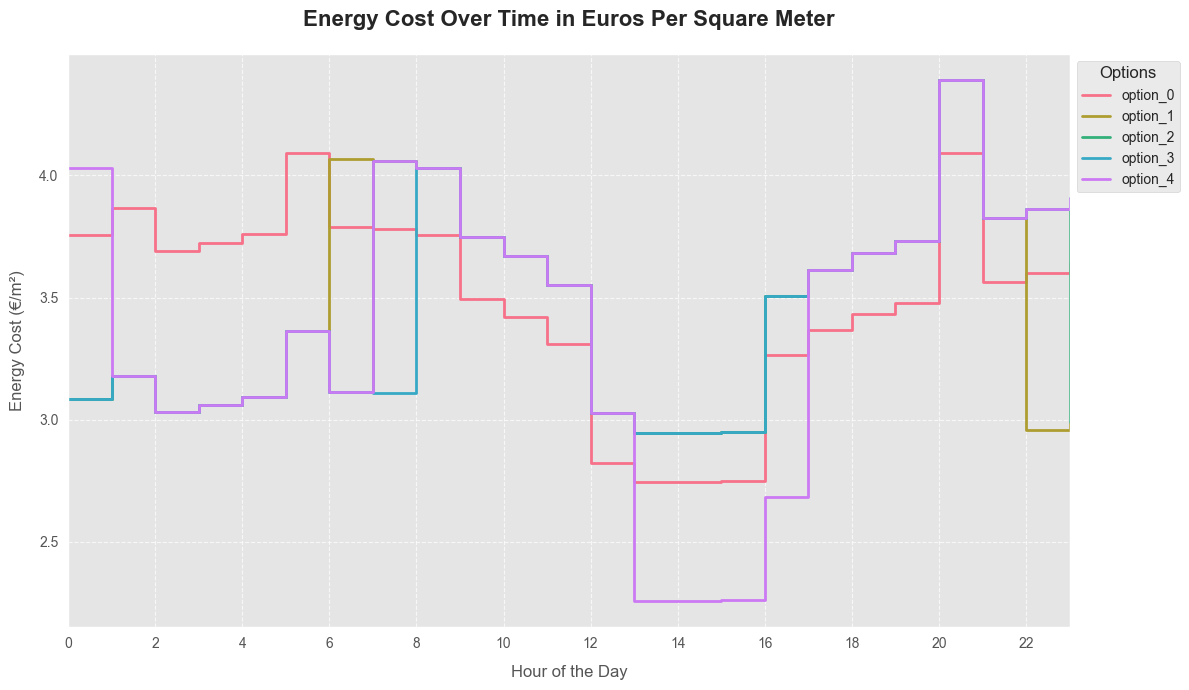

In [11]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
colors = sns.color_palette("husl", 5)

for i, option in enumerate(["option_0", "option_1", "option_2", "option_3", "option_4"]):
    ax.step(new_df.date_time.dt.hour, new_df[option], where="post", label=option,
            linewidth=2, color=colors[i])

ax.set_title("Energy Cost Over Time in Euros Per Square Meter", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Hour of the Day", fontsize=12, labelpad=10)
ax.set_ylabel("Energy Cost (€/m²)", fontsize=12, labelpad=10)
ax.set_xticks(range(0, 24, 2))
ax.set_xlim(0, 23)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(title="Options", title_fontsize='12', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


##### _This could be an insight on how to choose your EDF energy contract based on your consumption hours._